# Examinerande Uppgift: Maskininlärningsprojekt från Data till Web-API
-------------

## Fas 1: Datainsamling och Urval

### - Valt dataset

Jag har valt Breast Cancer Wisconsin (Diagnostic) Dataset, som finns publikt tillgängligt på Kaggle
. Datasetet härstammar ursprungligen från UCI Machine Learning Repository, som är en välkänd källa för öppna dataset inom maskininlärning.

### - Beskrivning av datasetet

Datasetet innehåller information från 569 patienter med totalt 30 olika mätvariabler relaterade till cellkärnornas egenskaper i bröstvävnadsprover. Variablerna är bland annat:
* Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, med flera.
Varje observation representerar ett tumörprov och varje rad är märkt med en av två klasser:

* Malignant (elakartad)

* Benign (godartad)

 

### - Motivering till valet

Jag valde detta dataset eftersom:

* Datasetet är balanserat och tydligt, vilket passar bra för att träna och utvärdera olika klassifikationsmodeller.

* Variablerna är numeriska , vilket underlättar för analys och modellering.

 

### - Prediktionsuppgift

Den specifika uppgiften är att klassificera om en tumör är elakartad eller godartad baserat på de diagnostiska mätvärdena.
Detta är en binär klassifikationsuppgift, där målet är att bygga en modell som kan förutsäga cancertypen utifrån insamlade medicinska data.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset file
df = pd.read_csv('data.csv')

## Fas 2: Explorativ Dataanalys (EDA) och Förbehandling

### - EDA

In [2]:
df.shape

(569, 33)

In [3]:
print(df.head())
print(df.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

<Axes: >

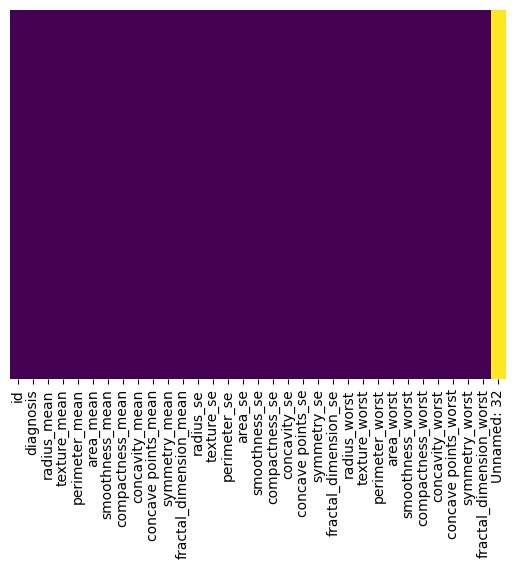

In [6]:
# visualize NAs in heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Vid analys av data fann man att det var numeriska data utan saknade data förutom den sista kolumnen, som är tom och kommer att tas bort, liksom den första kolumnen eftersom den inte påverkar resultaten. Bokstäverna ( B , M ) i den andra kolumnen kommer också att konverteras till siffror ( 0 , 1 ).

### - Datapreparation

In [7]:
# drop id and empty column
df.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

In [8]:
# turn target variable into 1s and 0s
df.diagnosis =[1 if value == "M" else 0 for value in df.diagnosis]

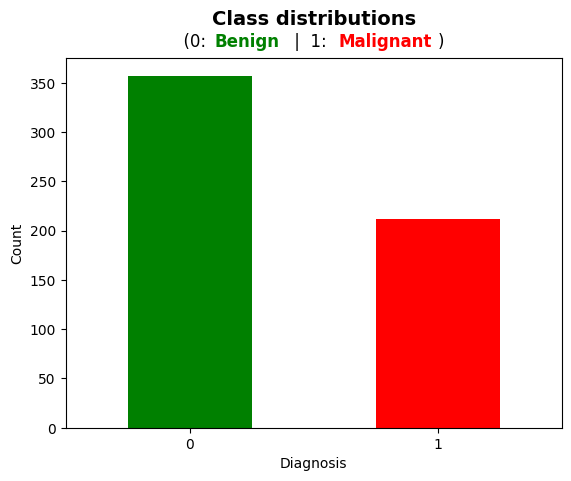

In [9]:
# Class distributions

counts = df['diagnosis'].value_counts()

ax = counts.plot(
    kind='bar',
    color=['green', 'red'],
    rot=0
)

# Axis labels
plt.xlabel('Diagnosis')
plt.ylabel('Count')
d=0.05
# Add multi-colored title manually
ax.text(0.5, 1.08, "Class distributions", transform=ax.transAxes,
        ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

ax.text(d+0.2, 1.02, "  (0:", transform=ax.transAxes,
        ha='center', va='bottom', fontsize=12, color='black')

ax.text(d+0.25, 1.02, "Benign", transform=ax.transAxes,
        ha='left', va='bottom', fontsize=12, fontweight='bold', color='green')

ax.text(d+0.4, 1.02, " |  1:", transform=ax.transAxes,
        ha='left', va='bottom', fontsize=12, color='black')

ax.text(d+0.5, 1.02, "Malignant", transform=ax.transAxes,
        ha='left', va='bottom', fontsize=12, fontweight='bold', color='red')

ax.text(d+0.7, 1.02, ")", transform=ax.transAxes,
        ha='left', va='bottom', fontsize=12, color='black')


plt.show()

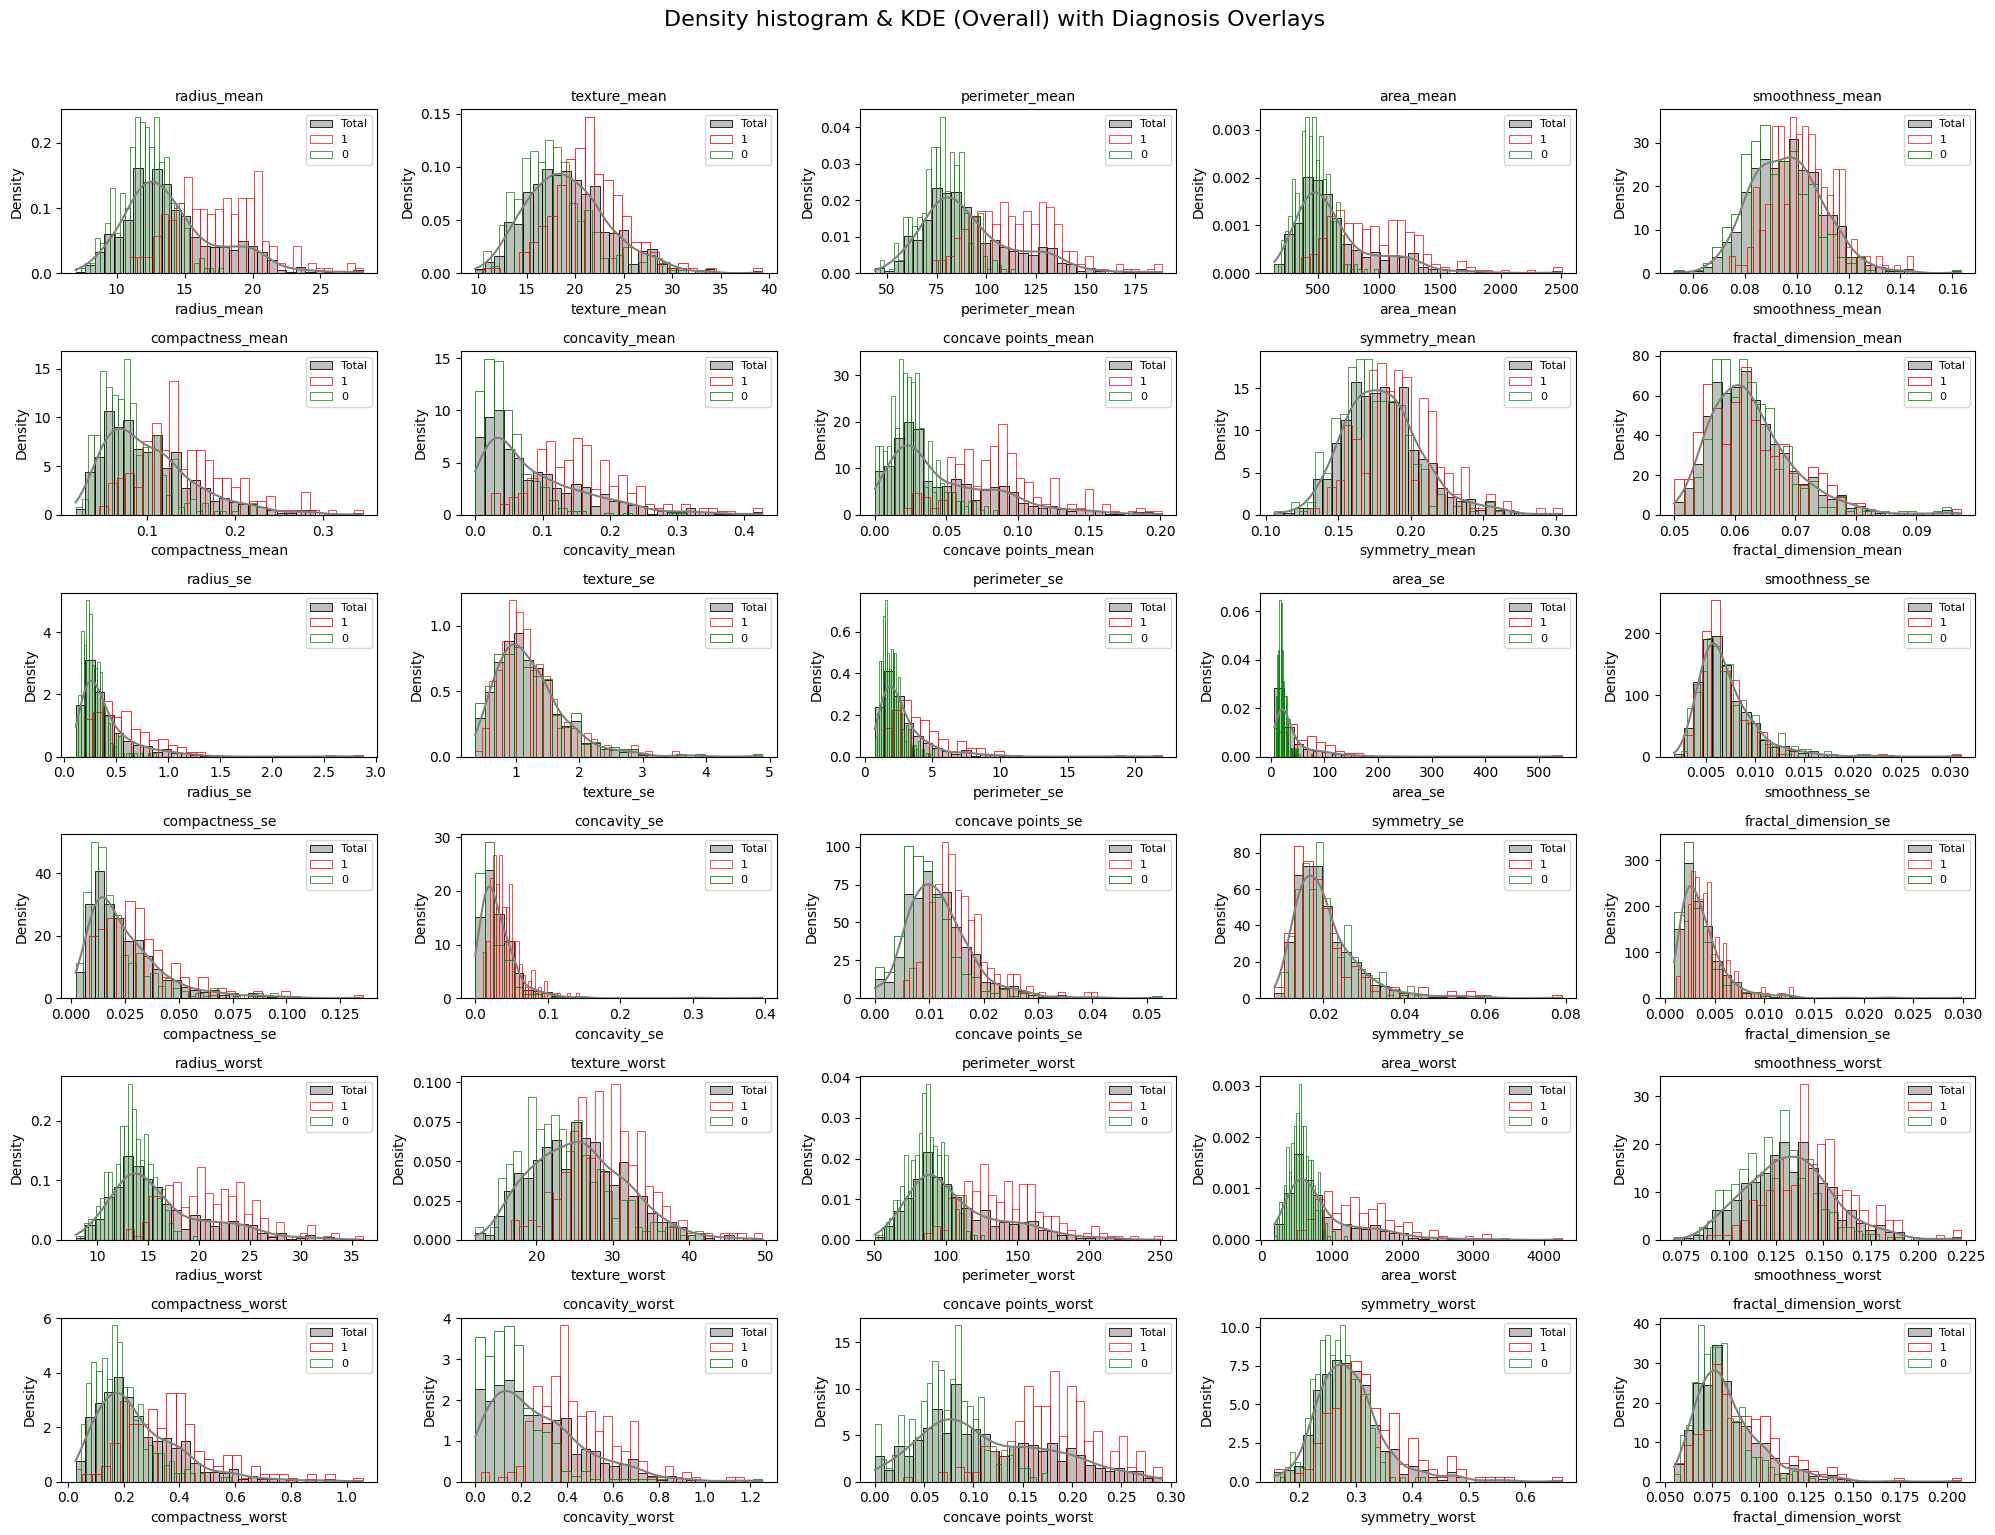

In [324]:
# histogramots of Data Features by Diagnosis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plotnumber = 1

# Adjust labels/colors for each 'diagnosis' category
diagnosis_classes = df['diagnosis'].unique()
colors = ['red', 'green']  # adjust to match the number of classes

for column in df.columns[1:]:  # Assuming df['diagnosis'] is the first column
    if plotnumber <= 30:
        ax = plt.subplot(6, 5, plotnumber)

        # ========== STEP 1: Plot total histogram and KDE ==========
        sns.histplot(
            data=df,
            x=column,
            bins=30,
            color='gray',
            kde=True,
            stat='density',
            element='bars',
            fill=True,
            label='Total'
        )

        # ========== STEP 2: Overlay histograms for each diagnosis ==========
        for i, cls in enumerate(diagnosis_classes):
            subset = df[df['diagnosis'] == cls]

            sns.histplot(
                data=subset,
                x=column,
                bins=30,
                stat="density",
                element='bars',
                fill=False,
                color=colors[i % len(colors)],
                label=f"{cls}"
            )

        plt.title(column, fontsize=10)
        plt.legend(fontsize=8)

    plotnumber += 1

plt.suptitle("Density histogram & KDE (Overall) with Diagnosis Overlays", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

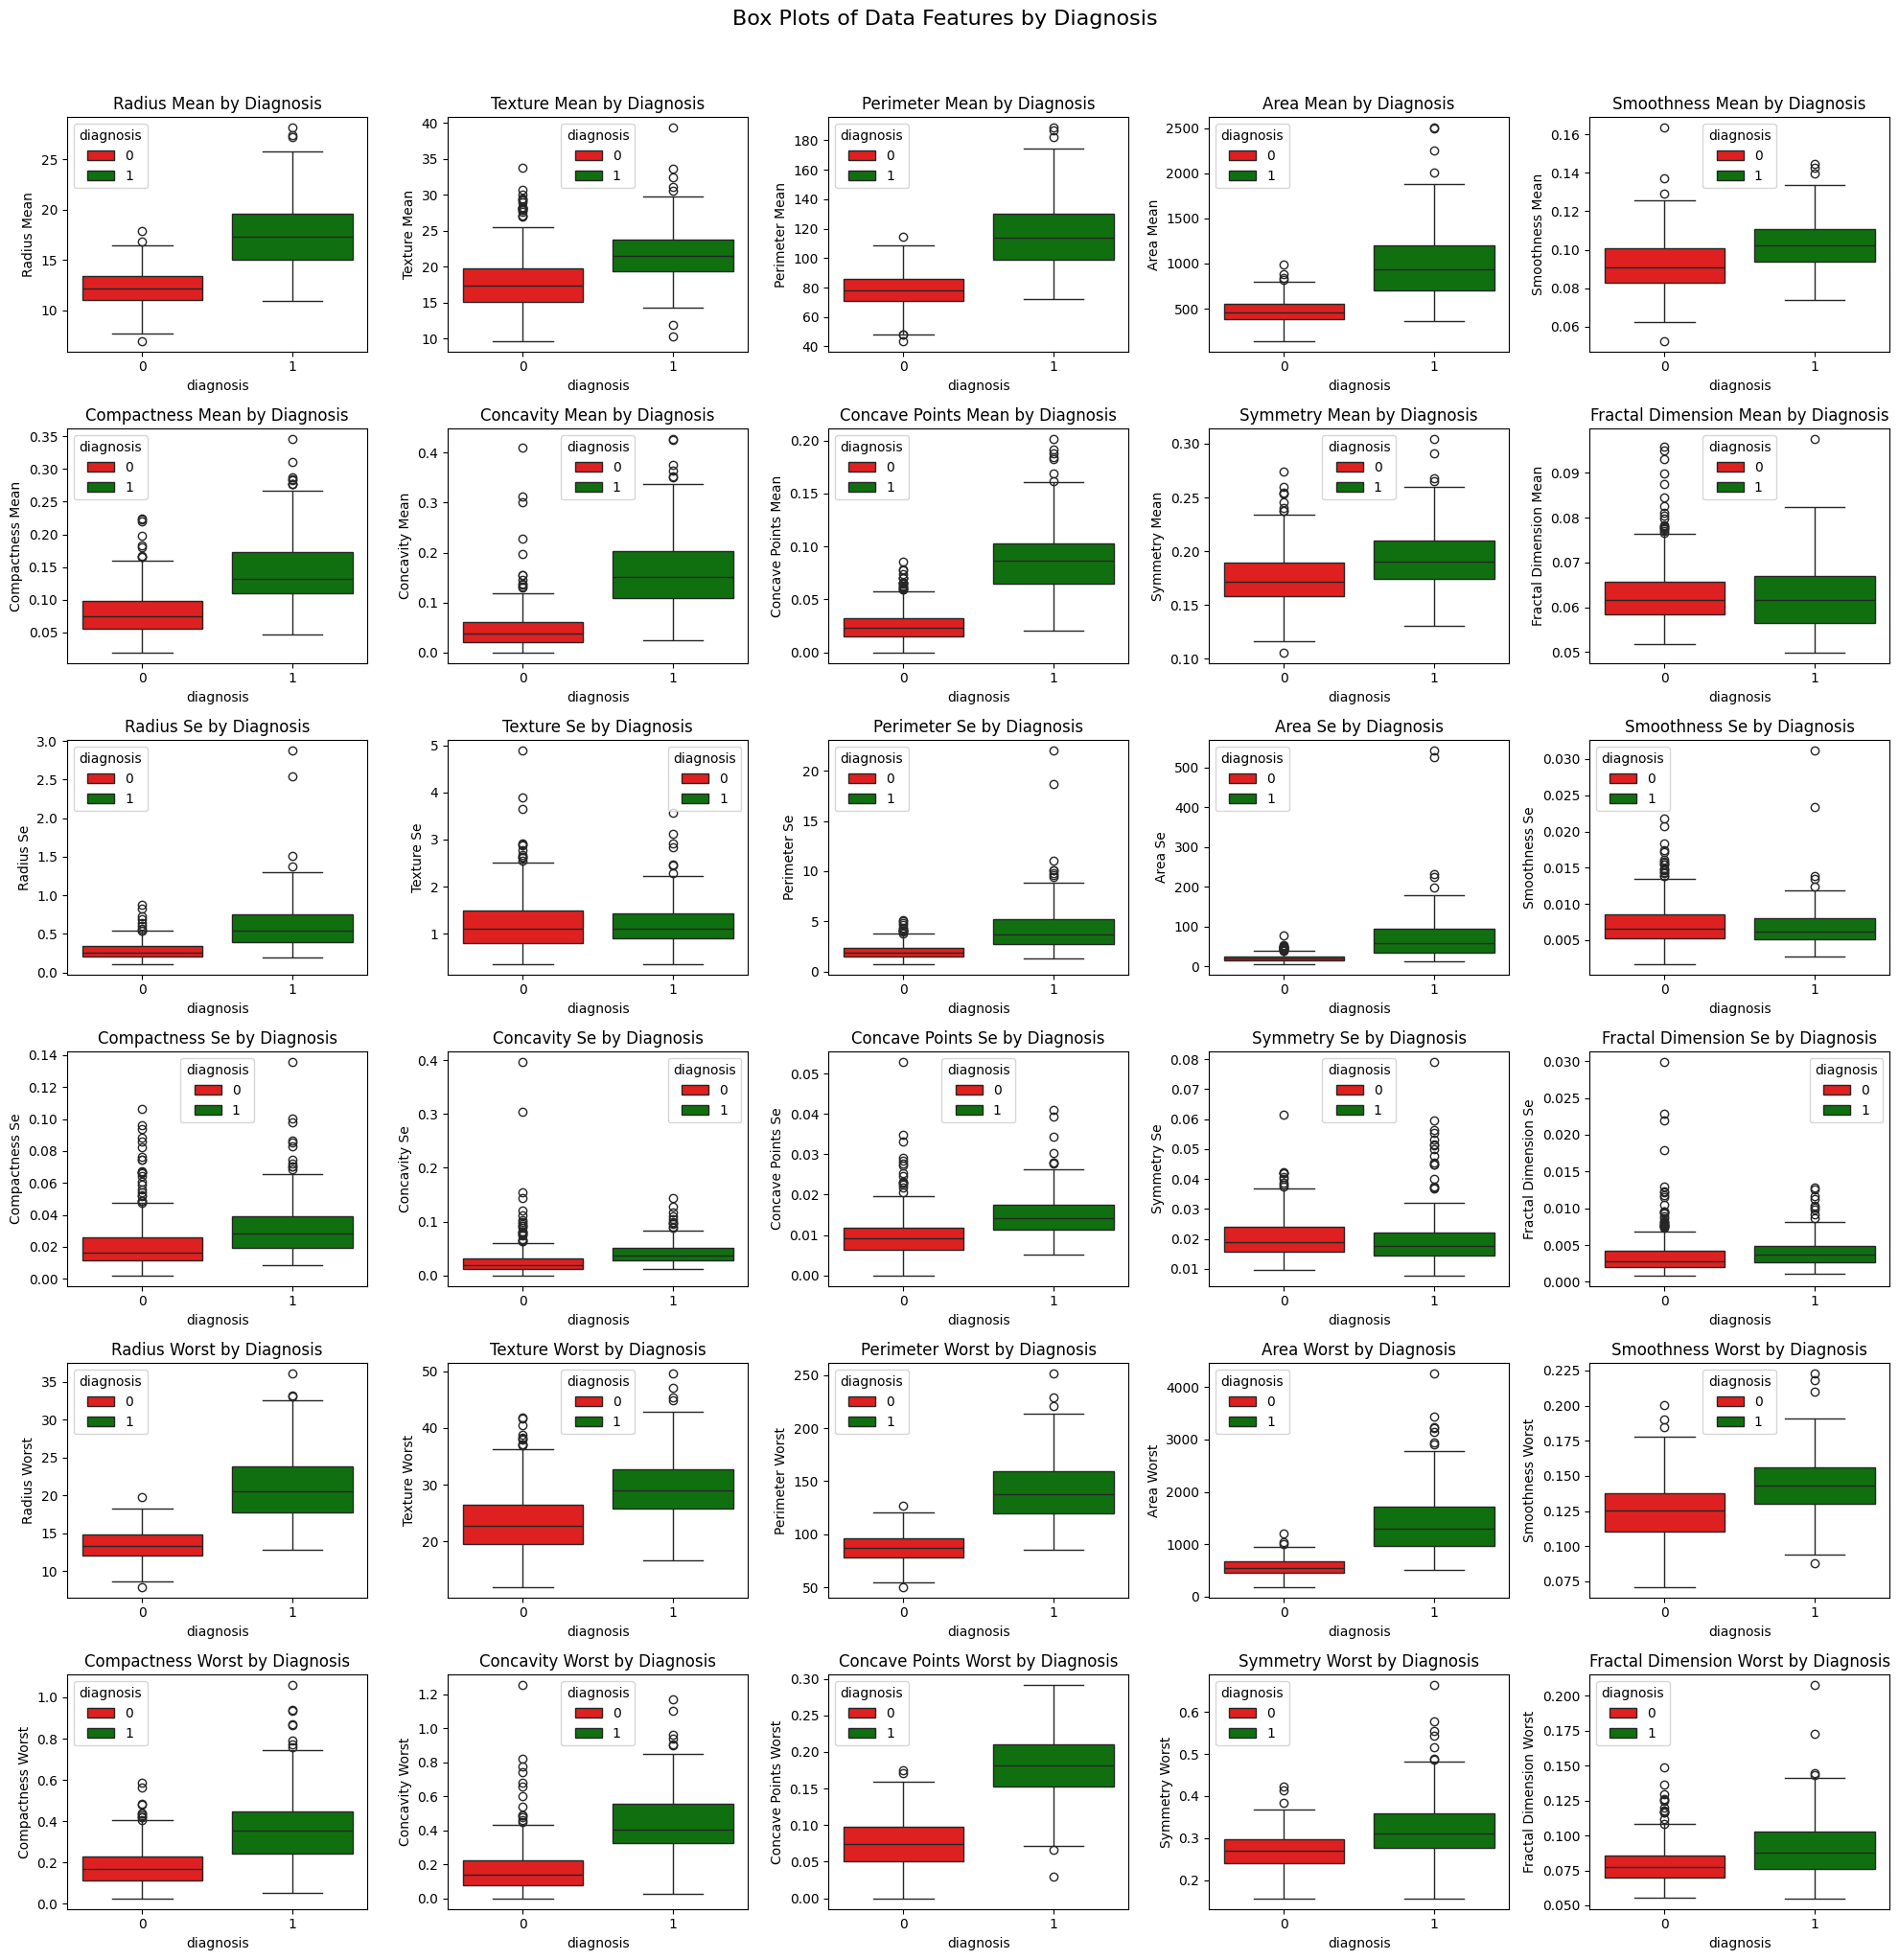

In [325]:
# Box Plots of Data Features by Diagnosis

plt.figure(figsize=(20,20))

for i, feature in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.boxplot(data=df, x='diagnosis', y=feature, hue='diagnosis', palette=["red", "green"])
    plt.title(f'{feature.replace("_", " ").title()} by Diagnosis')
    plt.ylabel(feature.replace("_", " ").title())

plt.suptitle("Box Plots of Data Features by Diagnosis", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


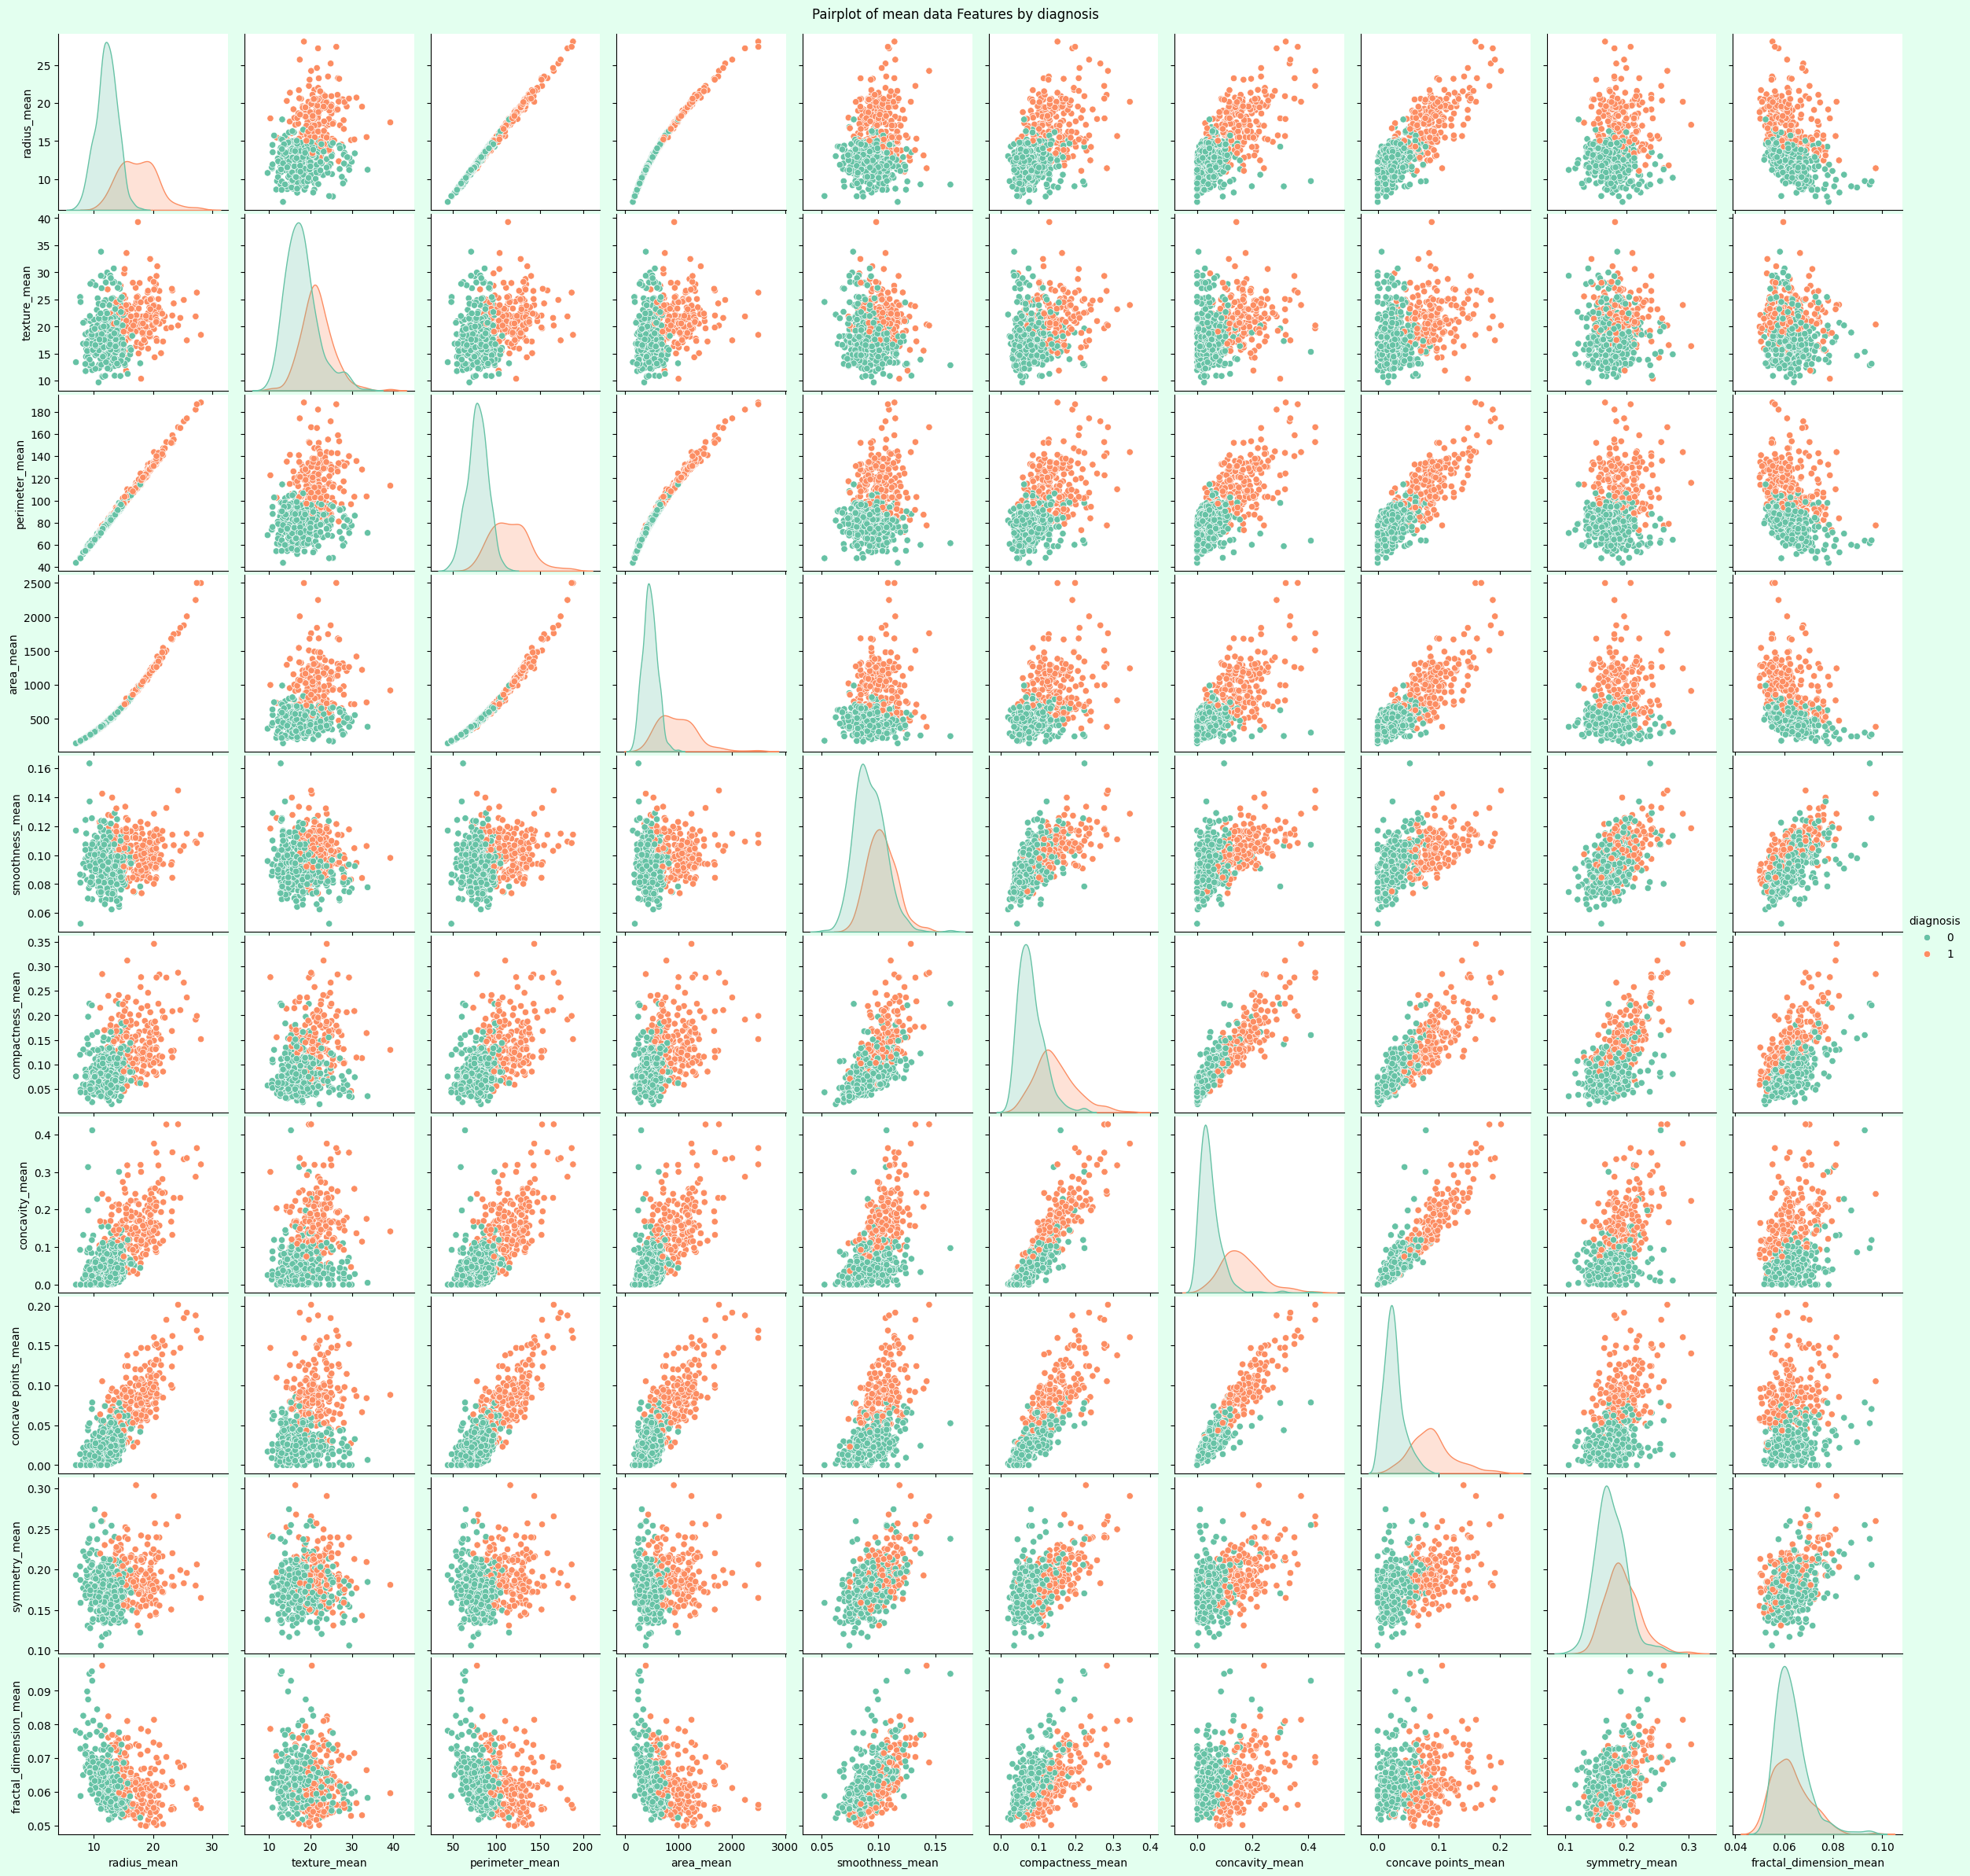

In [326]:
# Pairplot of mean data Features by diagnosis

def plotScatterMatrix(df):
    df = df.select_dtypes(include=[np.number]) 
    df = df[[col for col in df if df[col].nunique() > 1]]  
    columnNames = list(df)

    if len(columnNames) > 11:
        columnNames = columnNames[:11]

    df = df[columnNames]
    sns.pairplot(data=df, hue="diagnosis", palette="Set2", diag_kind="kde")
    plt.tight_layout(pad=6.0, w_pad=0.01, h_pad=0.01)  
    plt.suptitle('Pairplot of mean data Features by diagnosis')
    plt.gcf().patch.set_facecolor("#E3FFEF")  
    plt.show()


plotScatterMatrix(df)


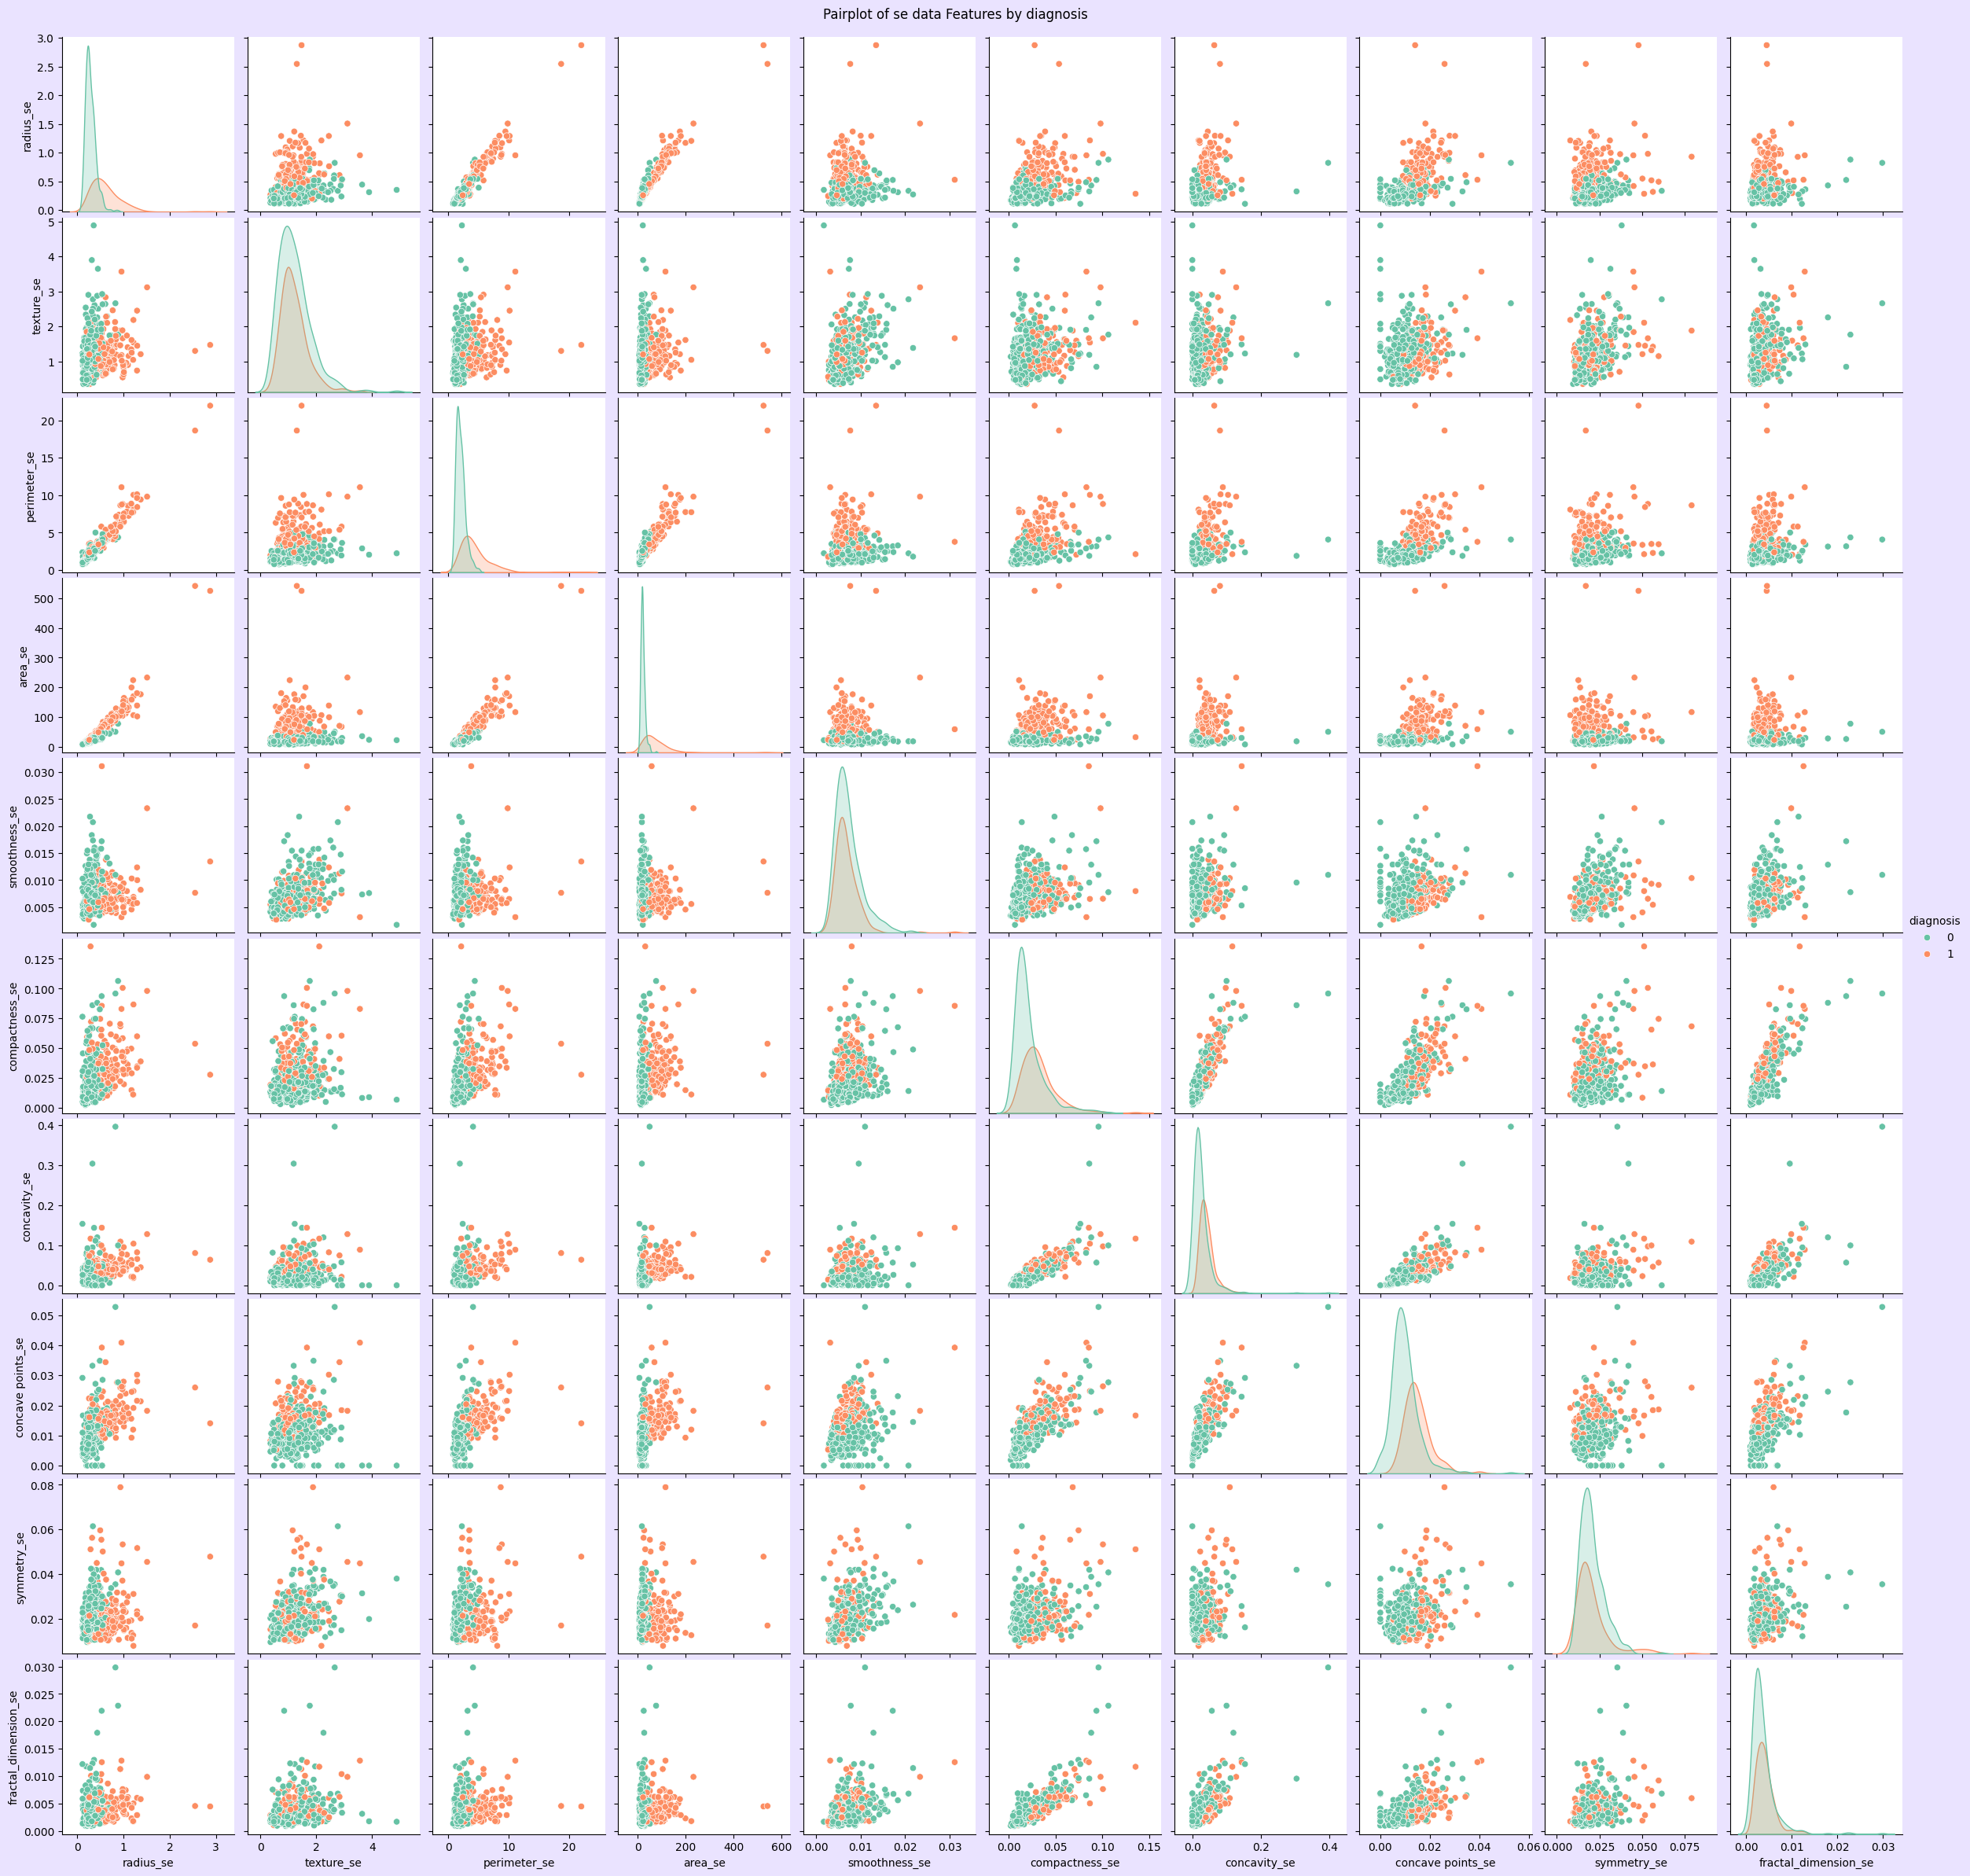

In [359]:
# Pairplot of se data Features by diagnosis

def plotScatterMatrix(df):
    df = df.select_dtypes(include=[np.number]) 
    df = df[[col for col in df if df[col].nunique() > 1]]  
    columnNames = list(df)

    columnNames = [columnNames[0]] + columnNames[11:21]

    df = df[columnNames]
    sns.pairplot(data=df, hue="diagnosis", palette="Set2", diag_kind="kde")
    plt.tight_layout(pad=6.0, w_pad=0.01, h_pad=0.01)  
    plt.suptitle('Pairplot of se data Features by diagnosis')
    plt.gcf().patch.set_facecolor("#eae3ff")  
    plt.show()


plotScatterMatrix(df)


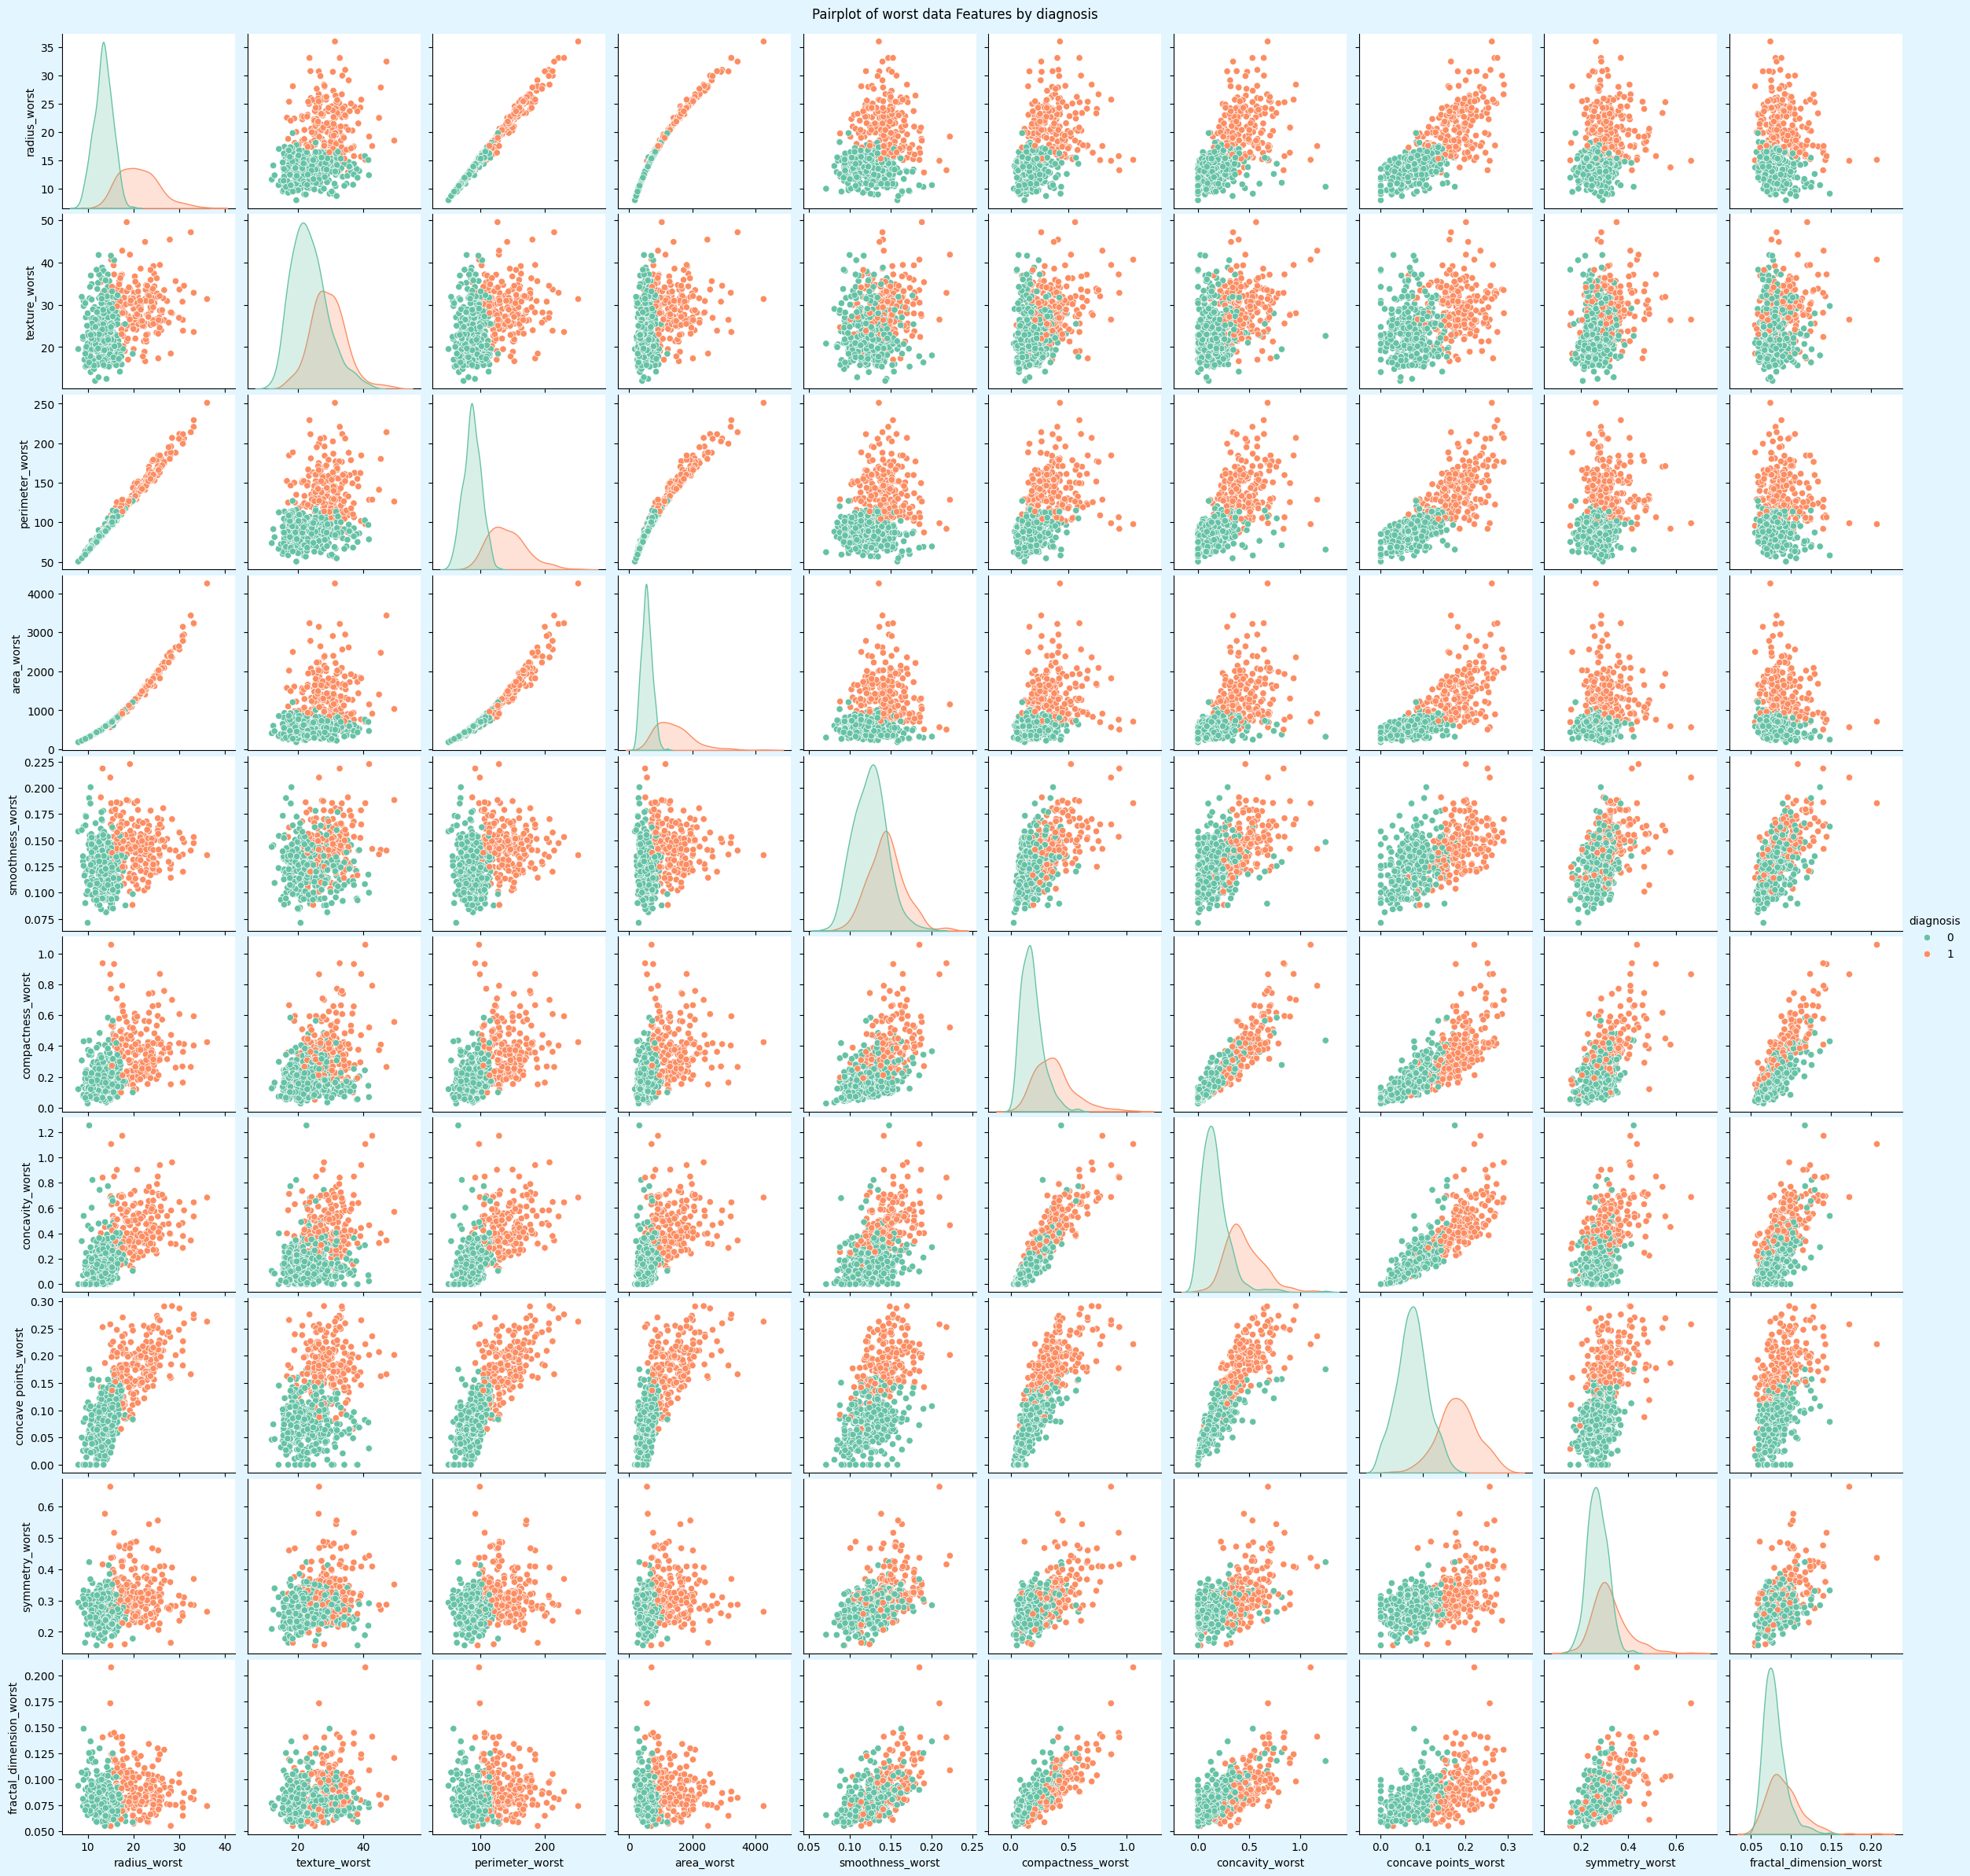

In [360]:
# Pairplot of worst data Features by diagnosis

def plotScatterMatrix(df):
    df = df.select_dtypes(include=[np.number]) 
    df = df[[col for col in df if df[col].nunique() > 1]]  
    columnNames = list(df)

    columnNames = [columnNames[0]] + columnNames[21:31]

    df = df[columnNames]
    sns.pairplot(data=df, hue="diagnosis", palette="Set2", diag_kind="kde")
    plt.tight_layout(pad=6.0, w_pad=0.01, h_pad=0.01)  
    plt.suptitle('Pairplot of worst data Features by diagnosis')
    plt.gcf().patch.set_facecolor("#e3f5ff")  
    plt.show()


plotScatterMatrix(df)


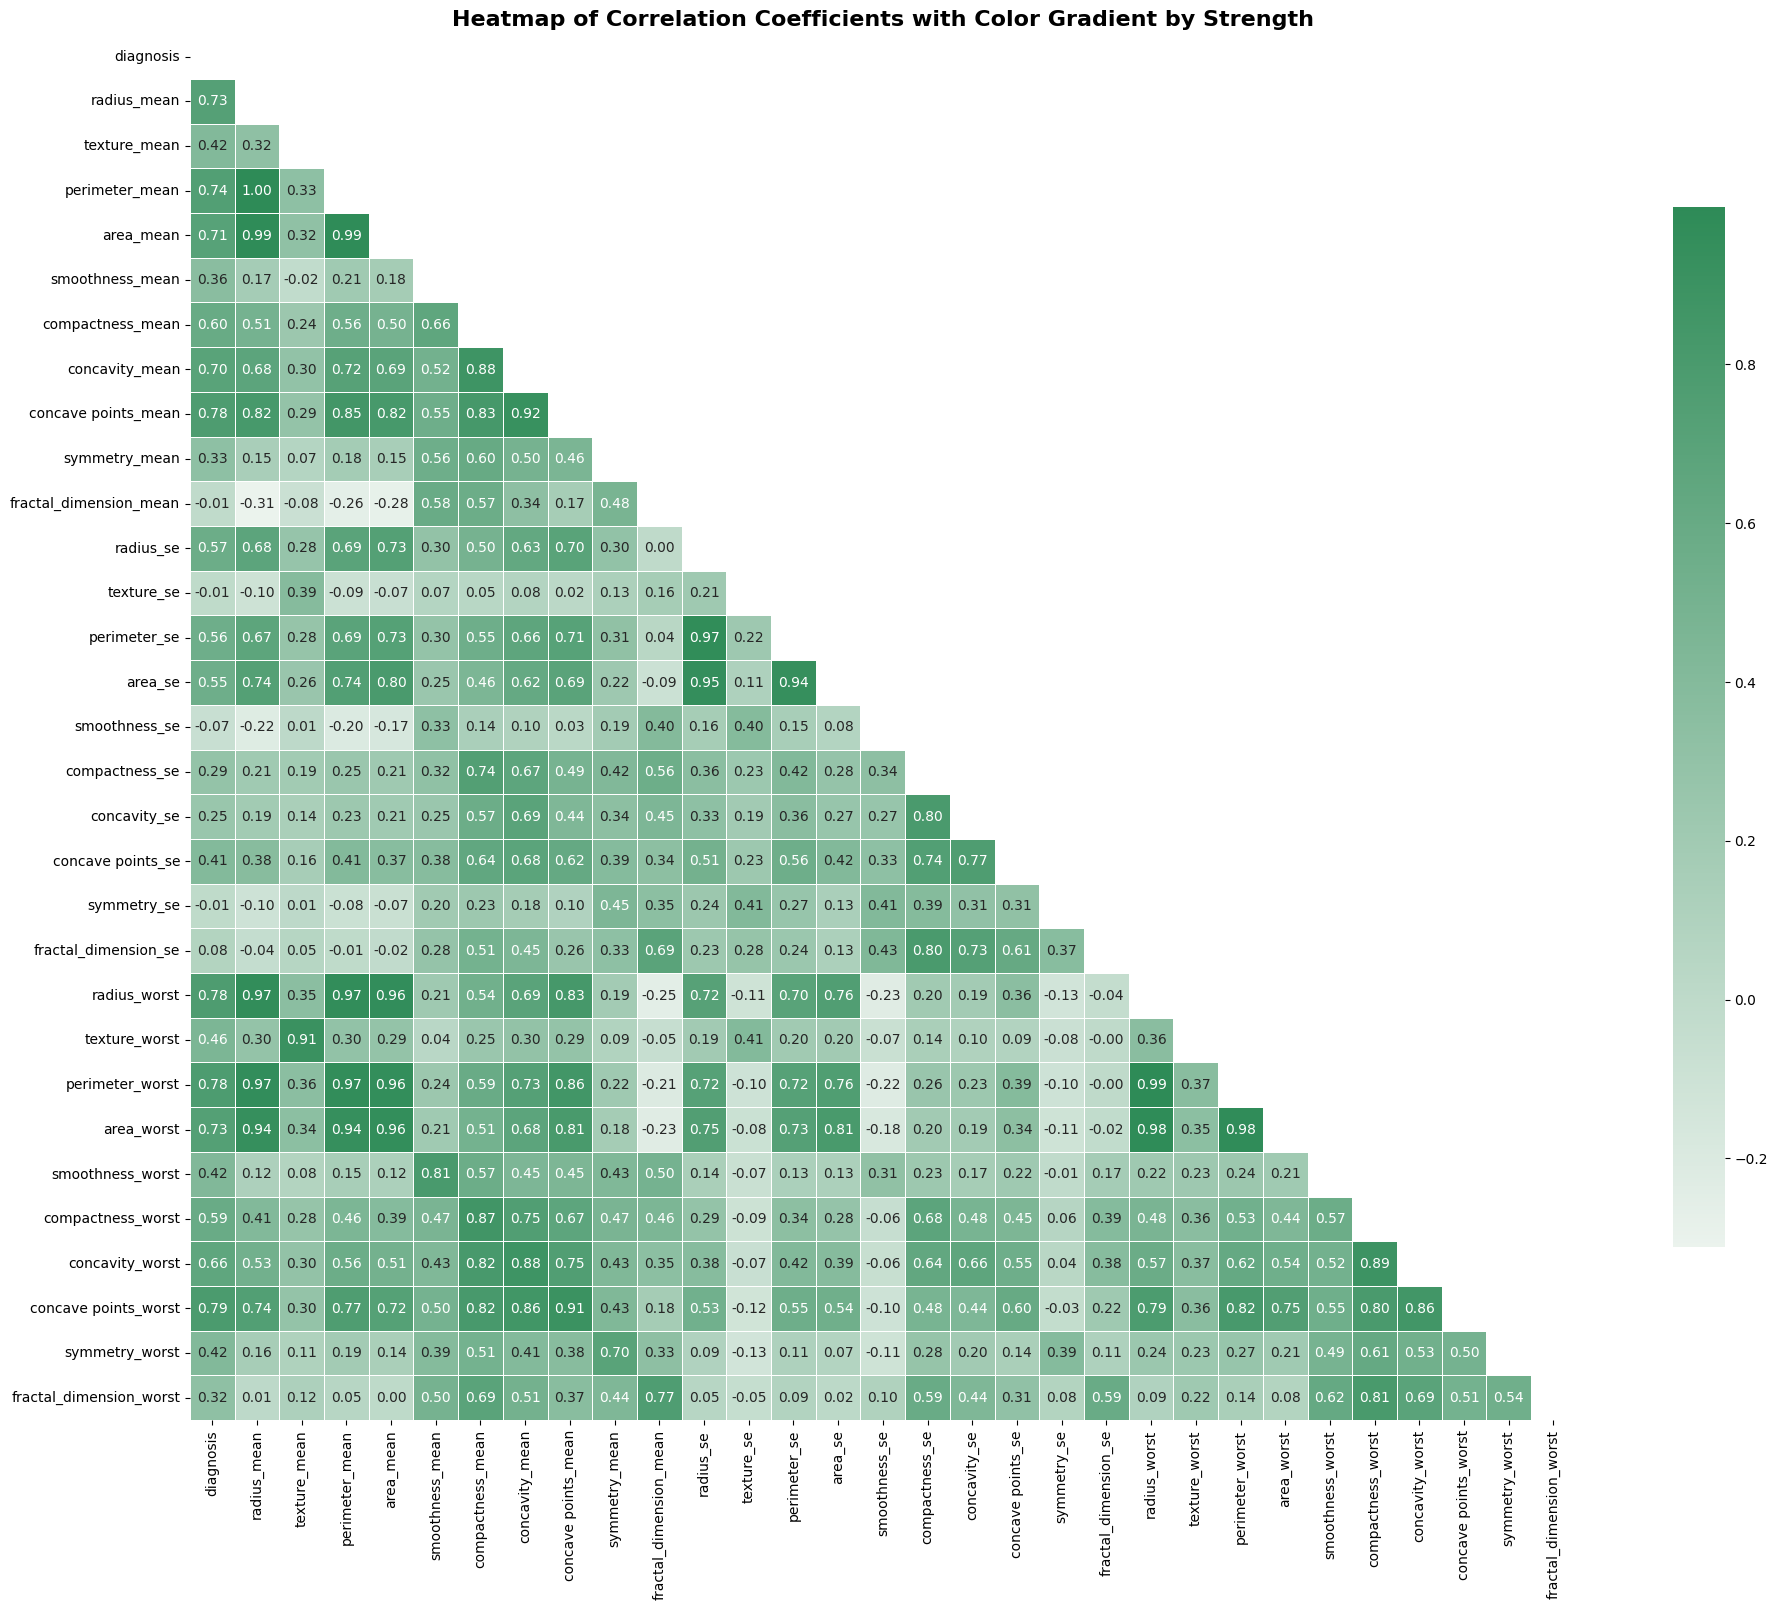

In [10]:
# Heatmap of Correlation Coefficients with Color Gradient by Strength

numeric_df = df.select_dtypes(include=[np.number])
corr_df = numeric_df.corr()
plt.figure(figsize=(25,18))
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(
    corr_df,
    mask=mask,
    cmap=sns.light_palette("seagreen", as_cmap=True),  
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title("Heatmap of Correlation Coefficients with Color Gradient by Strength", fontsize=16, fontweight='bold')
plt.show()


## Fas 3: Modellträning och Utvärdering
-----------------------------------------

In [11]:
y = df["diagnosis"] # target variable
X = df.drop(["diagnosis"], axis=1) # predictors

### - Delning av datan


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

### Skalning/normalisering av numeriska variabler

In [13]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [339]:
X_train.shape

(455, 30)

## Logistic Regression Model

In [14]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
# värdering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: {:.4f} %".format(accuracy * 100))
print("Precision Score: {:.4f} %".format(precision * 100))
print("Recall Score: {:.4f} %".format(recall * 100))
print("F1 Score: {:.4f} %".format(f1 * 100))

Accuracy Score: 97.3684 %
Precision Score: 97.6190 %
Recall Score: 95.3488 %
F1 Score: 96.4706 %


In [18]:
# drop radius_mean,radius_se,area_worst

df.drop(['radius_mean','radius_se','area_worst'], axis=1, inplace=True)

KeyError: "['radius_mean', 'radius_se', 'area_worst'] not found in axis"

In [21]:
y = df["diagnosis"] # target variable
X = df.drop(["diagnosis"], axis=1) # predictors

from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.shape

(455, 27)

In [25]:
# Logistic Regression Model till 27 colm.

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)

# värdering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: {:.4f} %".format(accuracy * 100))
print("Precision Score: {:.4f} %".format(precision * 100))
print("Recall Score: {:.4f} %".format(recall * 100))
print("F1 Score: {:.4f} %".format(f1 * 100))

Accuracy Score: 97.3684 %
Precision Score: 97.6190 %
Recall Score: 95.3488 %
F1 Score: 96.4706 %


----------------------------

## Random Forest Model

In [342]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [343]:
# värdering
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: {:.4f} %".format(accuracy * 100))
print("Precision Score: {:.4f} %".format(precision * 100))
print("Recall Score: {:.4f} %".format(recall * 100))
print("F1 Score: {:.4f} %".format(f1 * 100))

Accuracy Score: 96.4912 %
Precision Score: 97.5610 %
Recall Score: 93.0233 %
F1 Score: 95.2381 %


---------------------------
## Principal Component Analysis 

In [344]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

n_components = 8
pca = PCA(n_components=n_components)
pca.fit(X_train)

pc_train = pd.DataFrame(pca.transform(X_train), columns=["PC" + str(i + 1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test), columns=["PC" + str(i + 1) for i in range(n_components)])


In [345]:
# Logistic Regression Model Accuracy on the original data and PCA data
original_model = LogisticRegression()
original_model.fit(X_train, y_train)
y_pred = original_model.predict(X_test)

pca_lr_model = LogisticRegression()
pca_lr_model.fit(pc_train, y_train)
y2_pred = pca_lr_model.predict(pc_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy2 = accuracy_score(y_test, y2_pred)
precision2 = precision_score(y_test, y2_pred)
recall2 = recall_score(y_test, y2_pred)
f12 = f1_score(y_test, y2_pred)

print("Logistic Regression Model Accuracy (Original Data): {:.4f} %".format(accuracy * 100))
print("Logistic Regression Model Accuracy (PCA Data): {:.4f} %".format(accuracy2 * 100))
print("-----------------------------------------------------------------------------------------")
print("Logistic Regression Model Precision Score (Original Data): {:.4f} %".format(precision * 100))
print("Logistic Regression Model Precision Score (PCA Data): {:.4f} %".format(precision2 * 100))
print("-----------------------------------------------------------------------------------------")
print("Logistic Regression Model Recall Score (Original Data): {:.4f} %".format(recall * 100))
print("Logistic Regression Model Recall Score (PCA Data): {:.4f} %".format(recall2 * 100))
print("-----------------------------------------------------------------------------------------")
print("Logistic Regression Model F1 Score (Original Data): {:.4f} %".format(f1 * 100))
print("Logistic Regression Model F1 Score (PCA Data): {:.4f} %".format(f12 * 100))


Logistic Regression Model Accuracy (Original Data): 97.3684 %
Logistic Regression Model Accuracy (PCA Data): 99.1228 %
-----------------------------------------------------------------------------------------
Logistic Regression Model Precision Score (Original Data): 97.6190 %
Logistic Regression Model Precision Score (PCA Data): 100.0000 %
-----------------------------------------------------------------------------------------
Logistic Regression Model Recall Score (Original Data): 95.3488 %
Logistic Regression Model Recall Score (PCA Data): 97.6744 %
-----------------------------------------------------------------------------------------
Logistic Regression Model F1 Score (Original Data): 96.4706 %
Logistic Regression Model F1 Score (PCA Data): 98.8235 %


In [299]:
# Random Forest Classifier Model Accuracy on the original data and PCA data

original_model = RandomForestClassifier(n_estimators=100, random_state=42)
original_model.fit(X_train, y_train)
y_pred = original_model.predict(X_test)

pca_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
pca_rf_model.fit(pc_train, y_train)
y3_pred = pca_rf_model.predict(pc_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy3 = accuracy_score(y_test, y3_pred)
precision3 = precision_score(y_test, y3_pred)
recall3 = recall_score(y_test, y3_pred)
f13 = f1_score(y_test, y3_pred)

print("Random Forest Classifier Model Accuracy (Original Data): {:.4f} %".format(accuracy * 100))
print("Random Forest Classifier Model Accuracy (PCA Data): {:.4f} %".format(accuracy3 * 100))
print("-----------------------------------------------------------------------------------------")
print("Random Forest Classifier Model Precision Score (Original Data): {:.4f} %".format(precision * 100))
print("Random Forest Classifier Model Precision Score (PCA Data): {:.4f} %".format(precision3 * 100))
print("-----------------------------------------------------------------------------------------")
print("Random Forest Classifier Model Recall Score (Original Data): {:.4f} %".format(recall * 100))
print("Random Forest Classifier Model Recall Score (PCA Data): {:.4f} %".format(recall3 * 100))
print("-----------------------------------------------------------------------------------------")
print("Random Forest Classifier Model F1 Score (Original Data): {:.4f} %".format(f1 * 100))
print("Random Forest Classifier Model F1 Score (PCA Data): {:.4f} %".format(f13 * 100))

Random Forest Classifier Model Accuracy (Original Data): 96.4912 %
Random Forest Classifier Model Accuracy (PCA Data): 95.6140 %
-----------------------------------------------------------------------------------------
Random Forest Classifier Model Precision Score (Original Data): 97.5610 %
Random Forest Classifier Model Precision Score (PCA Data): 93.1818 %
-----------------------------------------------------------------------------------------
Random Forest Classifier Model Recall Score (Original Data): 93.0233 %
Random Forest Classifier Model Recall Score (PCA Data): 95.3488 %
-----------------------------------------------------------------------------------------
Random Forest Classifier Model F1 Score (Original Data): 95.2381 %
Random Forest Classifier Model F1 Score (PCA Data): 94.2529 %


## Slutsats
Utifrån ovanstående resultat ger  Logistic Regression Model med PCA den bästa noggrannheten och därför kommer vi att använda den i förutsägelserna.

------------
## Fas 4: API-utveckling

In [346]:
# Exportera model och scaler och PCA

joblib.dump(pca, "exportpca.joblib")
joblib.dump(pca_lr_model, "exportmodel.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']